In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [15]:
# Generate sample data
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Manual KNN Predictions: [0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0]
Actual Test Labels: [0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0]
Accuracy: 1.00

Scikit-learn KNN Accuracy: 1.00


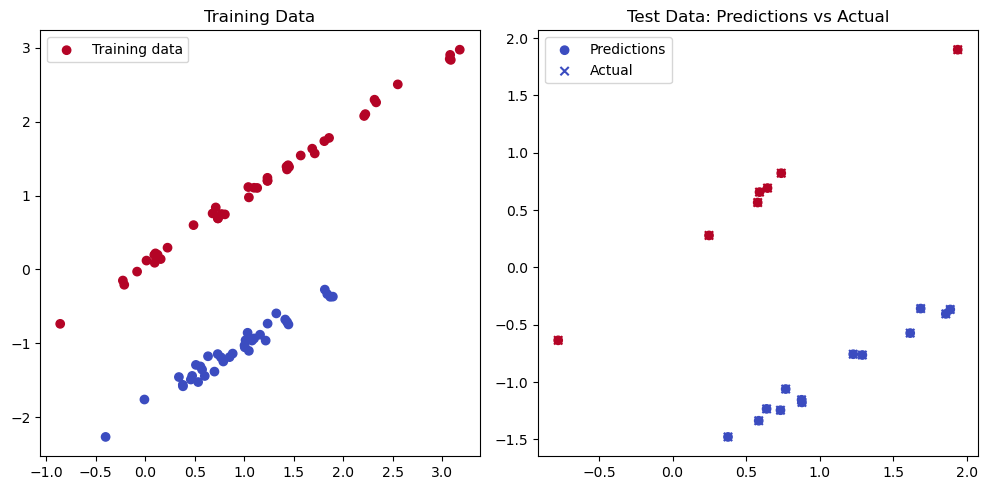

In [16]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def manual_knn_predict(X_train, y_train, X_test, k):
    predictions = []
    
    for test_point in X_test:
        distances = []
        
        # Calculate distance to each training point
        for idx, train_point in enumerate(X_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, y_train[idx]))
        
        # Sort by distance and get top k
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:k]
        
        # Get the most common class among k neighbors
        k_nearest_labels = [label for _, label in k_nearest]
        prediction = max(set(k_nearest_labels), 
                        key=k_nearest_labels.count)
        predictions.append(prediction)
    
    return np.array(predictions)

# Make predictions using our manual KNN
k = 3
predictions = manual_knn_predict(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Manual KNN Predictions: {predictions}")
print(f"Actual Test Labels: {y_test}")
print(f"Accuracy: {accuracy:.2f}")

# Compare with sklearn's KNN
from sklearn.neighbors import KNeighborsClassifier
sklearn_knn = KNeighborsClassifier(n_neighbors=k)
sklearn_knn.fit(X_train, y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
sklearn_accuracy = np.mean(sklearn_predictions == y_test)
print(f"\nScikit-learn KNN Accuracy: {sklearn_accuracy:.2f}")

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot training data
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Training data')
plt.title('Training Data')
plt.legend()

# Plot test data with predictions
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', label='Predictions')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Actual')
plt.title('Test Data: Predictions vs Actual')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

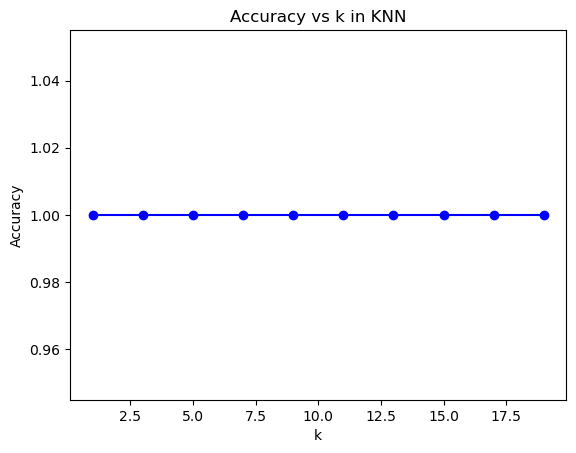

In [18]:
# Test different k values
k_values = range(1, 20, 2)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot accuracy vs k
plt.plot(k_values, scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k in KNN')
plt.show()